# Intoduction to inpainting

with inpainting, you provide an image to be edited as well as a mask that defines which part of the iamge should be changed. The mask is provided as a white or black image ( maskImage) or as a prompt (maskPrompt). Inpainting is used to remove items, replace items or add new items to the original image

In [2]:
import io
import json
import base64
import boto3
from botocore.config import Config
from PIL import Image
from utils import save_image, plot_images, plot_images_for_comparison

bedrock_runtime_client = boto3.client(
    "bedrock-runtime",
    region_name="us-east-1",
    config=Config(
        read_timeout=5 * 60
    ),  # IMPORTANT: Increase the read timeout to 5 minutes to support longer operations.
)
image_generation_model_id = "amazon.nova-canvas-v1:0"
output_dir = "output"

The following parameters are relevant to the "INPAINTING" task type and are encapsulated in the `inPaintingParams` field of the request body.

- `text` (Optional) – A text prompt to define what to change inside the mask. If you don't include this field, the model will remove the masked are from the image, replacing it with the background. Must be <= 1024 characters.
- `negativeText` (Optional) – A text prompt describing what elements or characteristics that should not be generated. Must be <= 1024 characters.
- The `inPaintingParams` fields are described below.
  - `image` (Required) – The JPEG or PNG image to modify, encoded as a Base64 string. (See code below for how to encode an image as Base64.)
  - You must define one of the following fields (but not both):
    - `maskPrompt` – A natural language text prompt that describing the region(s) of the image to edit.
    - `maskImage` – A black and white image in which pure black pixels indicate the area inside the mask and pure white pixels indicate the area outside the mask. The mask image must be the same dimensions at the input image. Its dimensions must match the dimensions of the input `image`.

The input image and mask image can be of any resolution that meets these requirements:

- Each side's length is no shorter than 320 and no longer than 4096
- Each side's length is evenly divisible by 16
- The aspect ratio ranges from 1:4 (portrait) through 4:1 (landscape)
- The total number of pixels (width x height) does not exceed 4,194,304 (the equivalent of 2048 x 2048)
- The `image` and `maskImage` must have the same resolution

# Inpainting with mask prompt

In [3]:
referenced_image= "output/01-text-to-image_seed-1.png"
mask_prompt="dog image"
text=" a white tshirt with a coconut tree graphic"
negative_text=(
    "colorful"
)
seed=0



In [9]:
with open(referenced_image,"rb") as image_file:
    reference_image_base64 = base64.b64encode(image_file.read()).decode("utf-8")
body = json.dumps(
        {
            "taskType": "INPAINTING",
            "inPaintingParams": {"text": text,
                                "negativeText":negative_text,
                                "image":reference_image_base64,
                                "maskPrompt":mask_prompt,
                                },
            "imageGenerationConfig": {
                "numberOfImages": 1,  # Number of images to generate, up to 5
                "width": 1024,
                "height": 1024,
                "cfgScale": 6.5,  # How closely the prompt will be followed
                "seed": seed,  # Any number from 0 through 858,993,459
                "quality": "premium",  # Quality of either "standard" or "premium"
            },
        }
    )
response = bedrock_runtime_client.invoke_model(
        body=body,
        modelId=image_generation_model_id,
        accept="application/json",
        contentType="application/json",
    )

response_body = json.loads(response.get("body").read())

base64_images = response_body.get("images")
image_path = f"{output_dir}/02-inpainting-with-mask-prompt-{seed}.png"
save_image(base64_images[0], image_path)

print(f"Saved to {image_path}")
generated_img = [
        Image.open(io.BytesIO(base64.b64decode(base64_image)))
        for base64_image in base64_images
    ]
#generated_images.append(generated_img[0])


Saved to output/02-inpainting-with-mask-prompt-0.png


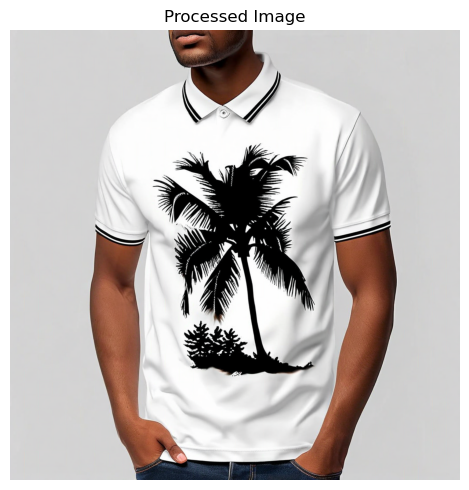

In [10]:
plot_images(generated_img)

# Inpainting with mask image

In [15]:
referenced_image= "output/01-text-to-image_seed-1.png"
mask_image_path="data/text-to-image_seed-1_mask.png"
text=" a white tshirt with a coconut tree graphic"
negative_text=(
    "colorful"
)
seed=30


In [17]:
with open(referenced_image,"rb") as image_file:
    reference_image_base64 = base64.b64encode(image_file.read()).decode("utf-8")
with open(mask_image_path,"rb") as image_file:
    image_image_base64 = base64.b64encode(image_file.read()).decode("utf-8")
body = json.dumps(
        {
            "taskType": "INPAINTING",
            "inPaintingParams": {"text": text,
                                "negativeText":negative_text,
                                "image":reference_image_base64,
                                "maskImage":image_image_base64,
                                },
            "imageGenerationConfig": {
                "numberOfImages": 1,  # Number of images to generate, up to 5
                "width": 1024,
                "height": 1024,
                "cfgScale": 6.5,  # How closely the prompt will be followed
                "seed": seed,  # Any number from 0 through 858,993,459
                "quality": "premium",  # Quality of either "standard" or "premium"
            },
        }
    )
response = bedrock_runtime_client.invoke_model(
        body=body,
        modelId=image_generation_model_id,
        accept="application/json",
        contentType="application/json",
    )

response_body = json.loads(response.get("body").read())

base64_images = response_body.get("images")
image_path = f"{output_dir}/02-inpainting-with-mask-image-{seed}.png"
save_image(base64_images[0], image_path)

print(f"Saved to {image_path}")
generated_img = [
        Image.open(io.BytesIO(base64.b64decode(base64_image)))
        for base64_image in base64_images
    ]
#generated_images.append(generated_img[0])


Saved to output/02-inpainting-with-mask-image-30.png
